# Mafalda

## Database Description

| **Bearing Discription**     ||
|------------------|-----------|
| Number of balls  | 8         |
| Balls diameter   | 0.7145	cm | 
| Cage diameter    | 2.8519	cm |

**Accelerometer**: IMI Sensors triaxial accelerometer, Model 604B31, returning data over the radial, axial and tangencial directions.

**Sampling rate**: 50 kHz

**During**: 5s

**Total of samples**: 250,000



## Imports

In [1]:
# imports
import numpy as np
import os
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_10573/2288594491.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [103]:
cwd = os.getcwd()

acquisition_maxsize=420_000
sample_size=8400

### Utils

In [5]:
import os

def list_files_in_directory(directory):
    try:        
        files = os.listdir(directory)
        return files
    except Exception as e:
        print("Error listing files:", e)
        return None

In [6]:
import pandas as pd

def read_csv_data(file_name):
    try:
        # Reading the CSV file
        data = pd.read_csv(file_name, header=None)
        
        # Renaming the columns
        column_names = ['Tachometer', 'Underhang_Axial', 'Underhang_Radial', 'Underhang_Tangential',
                        'Overhang_Axial', 'Overhang_Radial', 'Overhang_Tangential', 'Microphone']
        data.columns = column_names
        
        return data
    except Exception as e:
        print("Error reading the CSV file:", e)
        return None

In [7]:
def save_as_numpy_array(data, file_name):
    try:
        # Convert DataFrame to numpy array
        numpy_array = data.to_numpy()
        
        # Save numpy array to file
        np.save(file_name, numpy_array)
        print("Data saved as numpy array successfully.")
    except Exception as e:
        print("Error saving data as numpy array:", e)

In [8]:
import pandas as pd
from scipy.io import savemat

def save_as_matlab(data, file_name):
    try:
        # Convert DataFrame to dictionary
        data_dict = data.to_dict(orient='list')
        
        # Save data as MATLAB .mat file
        savemat(file_name, data_dict)
        print("Data saved as MATLAB .mat file successfully.")
    except Exception as e:
        print("Error saving data as MATLAB .mat file:", e)

In [9]:
from scipy.io import loadmat

def read_matlab_file(file_name):
    try:
        # Load MATLAB .mat file
        data = loadmat(file_name)
        return data
    except Exception as e:
        print("Error reading MATLAB .mat file:", e)
        return None

In [10]:
import os

def get_file_size(file_name):
    try:
        # Get the size of the file in bytes
        size_bytes = os.path.getsize(file_name)
        return size_bytes
    except Exception as e:
        print("Error getting file size:", e)
        return None

In [11]:
import os

def total_size_of_files(directory):
    total_size = 0
    try:
        # Iterate over all files in the directory
        for dirpath, _, filenames in os.walk(directory):
            for filename in filenames:
                # Get the full path of the file
                file_path = os.path.join(dirpath, filename)
                # Get the size of the file and add it to the total size
                total_size += os.path.getsize(file_path)
        return total_size
    except Exception as e:
        print("Error calculating total size of files:", e)
        return None

In [12]:
import os

def create_directory(directory):
    try:
        # Check if the directory already exists
        if not os.path.exists(directory):
            # Create the directory if it doesn't exist
            os.makedirs(directory)
            print("Directory created successfully:", directory)
        else:
            print("Directory already exists:", directory)
    except Exception as e:
        print("Error creating the directory:", e)


#### Saving the csv files to matlab files

**Instructions to use this dataset**



1. Download the Mafaulda Database:

    Click on the following links to download the Mafaulda database files:
        * [normal](https://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/normal.tgz)
        * [imbalance](https://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/imbalance.tgz)
        * [underhang](https://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/underhang.tgz)
        * [overhang](https://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/overhang.tgz)
        
2. Extract Files:

    Create a directory named **raw_mafaulda**.
    Extract the downloaded files into this directory.

3. Execute the following code

In [106]:
import re

directories = [
    'raw_mafaulda/normal',
    'raw_mafaulda/imbalance/6g',
    'raw_mafaulda/imbalance/10g',
    'raw_mafaulda/imbalance/15g',
    'raw_mafaulda/imbalance/20g',
    'raw_mafaulda/imbalance/25g',
    'raw_mafaulda/imbalance/30g',
    'raw_mafaulda/imbalance/35g',
    'raw_mafaulda/overhang/ball_fault/0g',
    'raw_mafaulda/overhang/ball_fault/6g',
    'raw_mafaulda/overhang/ball_fault/20g',
    'raw_mafaulda/overhang/ball_fault/35g',
    'raw_mafaulda/overhang/cage_fault/0g',
    'raw_mafaulda/overhang/cage_fault/6g',
    'raw_mafaulda/overhang/cage_fault/20g',
    'raw_mafaulda/overhang/cage_fault/35g',
    'raw_mafaulda/overhang/outer_race/0g',
    'raw_mafaulda/overhang/outer_race/6g',
    'raw_mafaulda/overhang/outer_race/20g',
    'raw_mafaulda/overhang/outer_race/35g',
    'raw_mafaulda/underhang/ball_fault/0g',
    'raw_mafaulda/underhang/ball_fault/6g',
    'raw_mafaulda/underhang/ball_fault/20g',
    'raw_mafaulda/underhang/ball_fault/35g',
    'raw_mafaulda/underhang/cage_fault/0g',
    'raw_mafaulda/underhang/cage_fault/6g',
    'raw_mafaulda/underhang/cage_fault/20g',
    'raw_mafaulda/underhang/cage_fault/35g',
    'raw_mafaulda/underhang/outer_race/0g',
    'raw_mafaulda/underhang/outer_race/6g',
    'raw_mafaulda/underhang/outer_race/20g',
    'raw_mafaulda/underhang/outer_race/35g',
]


rawfilesdir = "raw_mafaulda_matlab"
if not os.path.exists(rawfilesdir):
    os.makedirs(rawfilesdir)
else:
    print("Directory already exists:", rawfilesdir)


for directory in directories:
    
    list_files = list_files_in_directory(directory)

    match = re.search(r'\w+/(\w+)/?([\d]*^g|[a-z_]*)?/?(\d*)?g?', directory)
    groups = list(match.groups())
    if groups[0] == 'overhang' or groups[0] == 'underhang':        
        groups[0], groups[1] = groups[1], groups[0]
    for index, file in enumerate(list_files):
        path = os.path.join(directory, file)
        output_file = os.path.join(
            rawfilesdir, 
            f"{'N' if groups[0] == 'imbalance' else groups[0][0].upper()}_{'0' if groups[1] == '' else groups[1][0].upper()}_{'0' if groups[2] == '' else groups[2]}_{index}.mat" )

        data = read_csv_data(path)[:acquisition_maxsize]
        save_as_matlab(data, output_file)

Directory already exists: raw_mafaulda_matlab


**Number of Sequences**

In [105]:
import re

list_files = list_files_in_directory('raw_mafaulda_matlab')
print(f"Total of files: {len(list_files)}")


counter = {
    'normal': 0,
    'normal_imbalanced_6': 0,
    'normal_imbalanced_10': 0,
    'normal_imbalanced_15': 0,
    'normal_imbalanced_20': 0,
    'normal_imbalanced_25': 0,
    'normal_imbalanced_30': 0,
    'normal_imbalanced_35': 0,
    'ball_overhang_0': 0,
    'ball_overhang_6': 0,
    'ball_overhang_20': 0,
    'ball_overhang_35': 0,
    'cage_overhang_0': 0,
    'cage_overhang_6': 0,
    'cage_overhang_20': 0,
    'cage_overhang_35': 0,
    'outer_overhang_0': 0,
    'outer_overhang_6': 0,
    'outer_overhang_20': 0,
    'outer_overhang_35': 0,
    'ball_underhang_0': 0,
    'ball_underhang_6': 0,
    'ball_underhang_20': 0,
    'ball_underhang_35': 0,
    'cage_underhang_0': 0,
    'cage_underhang_6': 0,
    'cage_underhang_20': 0,
    'cage_underhang_35': 0,
    'outer_underhang_0': 0,
    'outer_underhang_6': 0,
    'outer_underhang_20': 0,
    'outer_underhang_35': 0,
}

for file in list_files:
    # N_0_20_24.mat   
    for key in counter.keys():        

        match_key = re.search(r'(\w+)_(\w+)_(\d+)', key)      
        match_file = re.search(r'(\w+)_(\w+)_(\d+)_\d+.mat', file)
        
        if match_key and match_file:

            label_key = match_key.group(1)[0].upper()
            position_key = match_key.group(2)[0].upper()
            load_key = match_key.group(3)

            label_file = match_file.group(1)
            position_file = match_file.group(2)
            load_file = match_file.group(3)

            if label_key == label_file and position_key == position_file and load_key == load_file:  
                counter[key] = counter[key] + 1
            
            if label_key == label_file and position_key == 'I' and load_key == load_file:  
                counter[key] = counter[key] + 1

        else:
            if key == 'normal':
                if file[0] == 'N' and file[4] == '0':
                    counter['normal'] = counter['normal'] + 1


print(counter)
total = sum([i for i in counter.values()])
print(total)

Total of files: 1453
{'normal': 49, 'normal_imbalanced_6': 49, 'normal_imbalanced_10': 48, 'normal_imbalanced_15': 48, 'normal_imbalanced_20': 49, 'normal_imbalanced_25': 47, 'normal_imbalanced_30': 47, 'normal_imbalanced_35': 45, 'ball_overhang_0': 49, 'ball_overhang_6': 43, 'ball_overhang_20': 25, 'ball_overhang_35': 20, 'cage_overhang_0': 49, 'cage_overhang_6': 49, 'cage_overhang_20': 49, 'cage_overhang_35': 41, 'outer_overhang_0': 49, 'outer_overhang_6': 49, 'outer_overhang_20': 49, 'outer_overhang_35': 41, 'ball_underhang_0': 50, 'ball_underhang_6': 49, 'ball_underhang_20': 49, 'ball_underhang_35': 38, 'cage_underhang_0': 49, 'cage_underhang_6': 48, 'cage_underhang_20': 49, 'cage_underhang_35': 42, 'outer_underhang_0': 49, 'outer_underhang_6': 49, 'outer_underhang_20': 49, 'outer_underhang_35': 37}
1453


In [71]:
# saving the files in a npy file
acquisition_maxsize = 420_000
directory = "raw_mafalda/overhang/ball_fault/20g"
print(len(list_files_in_directory(directory)))
files = list_files_in_directory(directory)

# create_directory("raw_mafaulda_npy")
# create_directory("raw_mafaulda_mat")
for index, file in enumerate(files):
    path = os.path.join(directory, file)
    data = read_csv_data(path)[:acquisition_maxsize]
    if data['Underhang_Axial'].shape[0] != 250_000:
        print("Diferente")

    # save_as_numpy_array(data, f"raw_mafaulda_npy/N_{index}") # fault_load_index
    # save_as_matlab(data, f"raw_mafaulda_mat/N_0_{index}.mat")

25


**Variância**

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

directory = "raw_mafaulda/normal"
files = list_files_in_directory(directory)

variances_diff = {}
for file in files:
    path = os.path.join(directory, file)
    data = read_csv_data(path)
    df = pd.DataFrame(data)
    
    vars = {
        'Underhang_Axial': [],
        'Underhang_Radial': [],
        'Underhang_Tangential': [],
        'Overhang_Axial': [],
        'Overhang_Radial': [],
        'Overhang_Tangential': []
    }
    means = {
        'Underhang_Axial': [],
        'Underhang_Radial': [],
        'Underhang_Tangential': [],
        'Overhang_Axial': [],
        'Overhang_Radial': [],
        'Overhang_Tangential': []
    }
    
    for step in range(0, 250_000, 25_000):
        for position in vars.keys():
            vars[position].append(df[step:step+25_000][position].var())
            means[position].append(df[step:step+25_000][position].mean())
    
    # variance
    var_diff = {}
    for key, values in vars.items():
        diff = max(values)-min(values)
        var_diff[key] = diff
        if diff >= 10:
            print(f'{file}[{key}]  Is >= 10!')

    # mean
    mean_diff = {}
    for key, values in means.items():
        diff = max(values)-min(values)
        mean_diff[key] = diff
        if diff >= 10:
            print(f'{file}[{key}]  Is >= 10!')

    variances_diff[file] = var_diff

var_df = pd.DataFrame(variances_diff)


In [45]:
df = var_df.T

idxmax = df.idxmax()
idxmin = df.idxmin()

print('Arquivos com variância máxima')
print(idxmax)
print()
print('Arquivos com variância mínima')
print(idxmin)

Arquivos com variância máxima
Underhang_Axial         15.1552.csv
Underhang_Radial        44.6464.csv
Underhang_Tangential    59.5968.csv
Overhang_Axial          17.2032.csv
Overhang_Radial         27.4432.csv
Overhang_Tangential      60.416.csv
dtype: object

Arquivos com variância mínima
Underhang_Axial         33.5872.csv
Underhang_Radial         12.288.csv
Underhang_Tangential     12.288.csv
Overhang_Axial          52.4288.csv
Overhang_Radial         34.2016.csv
Overhang_Tangential     27.4432.csv
dtype: object


In [51]:
largest = df.nlargest(4, 'Underhang_Axial')
largest2 = df.nlargest(4, 'Underhang_Radial')
largest3 = df.nlargest(4, 'Underhang_Tangential')
largest3

,Underhang_Axial,Underhang_Radial,Underhang_Tangential,Overhang_Axial,Overhang_Radial,Overhang_Tangential
59.5968.csv,0.037193,0.026920,0.011326,0.050278,0.001473,0.510674
61.44.csv,0.013038,0.008842,0.009581,0.020549,0.000610,0.176384
48.9472.csv,0.033444,0.020120,0.007852,0.173808,0.000576,0.040978
46.2848.csv,0.015667,0.034454,0.007677,0.068435,0.000087,0.050701


In [32]:
dir = "raw_mafalda/underhang/cage_fault/20g"
files_name = list_files_in_directory(dir)
len(files_name)

49

##### Ball Fault

In [28]:
import re

directories = [
    "raw_mafalda/overhang/ball_fault/0g",
    "raw_mafalda/overhang/ball_fault/6g",
    "raw_mafalda/overhang/ball_fault/20g",
    "raw_mafalda/overhang/ball_fault/35g",
    "raw_mafalda/underhang/ball_fault/0g",
    "raw_mafalda/underhang/ball_fault/6g",
    "raw_mafalda/underhang/ball_fault/20g",
    "raw_mafalda/underhang/ball_fault/35g",
]

create_directory("raw_mafalda_npy")
for directory in directories:
    files = list_files_in_directory(directory)
    load = re.findall(r"(\d+)g", directory)[0]
    position = re.findall(r"overhang|underhang", directory)[0]
    for index, file in enumerate(files):
        path = os.path.join(directory, file)
        data = read_csv_data(path)[:acquisition_maxsize]
        save_as_numpy_array(data, f"raw_mafalda_npy/b_{position[0]}_{load}_{index}")

Directory already exists: raw_mafalda_npy
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully.
Data saved as numpy array successfully

TypeError: 'NoneType' object is not subscriptable

#### Checking storage reduction of npy files 

In [24]:
# considering the reduction in the amount of sample data to 420_000 in the npy file

total_size_csv = total_size_of_files("raw_mafalda")/(1024*1024)
total_size_npy = total_size_of_files("raw_mafaulda_npy")/(1024*1024)
total_size_mat = total_size_of_files("raw_mafaulda_mat")/(1024*1024)

print("Size of CSV file:", total_size_csv, "MB")
print("Size of Array Numpy file:", total_size_npy, "MB")
print("Size of Matlab file:", total_size_mat, "MB")

Size of CSV file: 31783.83728122711 MB
Size of Array Numpy file: 747.6866455078125 MB
Size of Matlab file: 747.7143096923828 MB


## Construindo gráficos

In [ ]:
print(data.shape)
plt.plot(data)
plot_fft(label='B500', key='data', sample_size=5000)
plot_fft(label='B500', key='ru', sample_size=5000)


## Espectograma

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import display, clear_output
import time

nperseg = 505 # segments for the image
noverlap = 460 # over lap per image used
segment_size = 512 # setting size of image

def spectogram_plot(data, fs):
    for i in range(0, segment_size*100, segment_size):
        print(f'segment = data[{i}:{segment_size}]')
        segment = data[i:i+segment_size]
        f, t, Sxx = signal.stft(segment, nperseg=1024)
        
        plt.clf()

        fig = plt.figure(figsize=(8, 6))
        plt.imshow(np.fliplr(abs(Sxx).T).T, cmap='viridis', aspect='auto', extent=[t.min(), t.max(), f.min(), f.max()])
        # can comment out plt.axis('off') to see the x and y axis
        plt.ylabel('Frequency [kHz]')
        plt.xlabel('Number of Samples')
        plt.axis('off')

        display(plt.gcf())        
        clear_output(wait=True)        
        time.sleep(0.5)

In [ ]:

for key in ['B500']:
    matlab_file = scipy.io.loadmat(os.path.join(cwd, files_path[key+'.mat']))
    print(matlab_file['data'].shape)
    data = matlab_file['data'].reshape(1,-1)[0][0:acquisition_maxsize]
    spectogram_plot(data, fs=51_200)

In [ ]:
import subprocess
import csv
from datetime import datetime

def redirecionar_saida_para_csv(nome_do_arquivo):
    def decorator(funcao):
        @wraps(funcao)
        def wrapper(*args, **kwargs):
            try:
                # Execute a função e capture a saída
                resultado = funcao(*args, **kwargs)

                # Abra o arquivo CSV para escrita (modo "a" para adicionar ao arquivo)
                with open(nome_do_arquivo, "a", newline="") as arquivo_csv:
                    writer = csv.writer(arquivo_csv)

                    # Escreva a saída no arquivo CSV com data e hora
                    data_hora_atual = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                    writer.writerow([f"Execução em {data_hora_atual}"])
                    writer.writerow([resultado])
                    writer.writerow(["-" * 40])  # Linha divisória

                print(f"Saída salva em {nome_do_arquivo}")
            except subprocess.CalledProcessError:
                print("Erro ao executar o programa.")

        return wrapper

    return decorator

# Exemplo de uso:
@redirecionar_saida_para_csv("saida.csv")
def meu_programa():
    # Suponha que você tenha algum resultado a ser exibido
    resultado = "Isso é um exemplo de saída."
    return resultado

@redirecionar_saida_para_csv("saida.csv")
def minha_funcao():
    # Suponha que você tenha algum resultado a ser exibido
    resultado = "Meu exemplo."
    return resultado


if __name__ == "__main__":

    meu_programa()
    # minha_funcao()


In [ ]:
import sys
import csv
from datetime import datetime

def log_experiment(func):
    def wrapper(*args, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        filename = f"log_{timestamp}.csv"
        
        with open(filename, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)            
           
            original_stdout = sys.stdout
            sys.stdout = csvfile
            
            result = func(*args, **kwargs)
            
            sys.stdout = original_stdout
            
            # Retorna o resultado da função original
            return result
    
    return wrapper

# Exemplo de uso do decorator
@log_experiment
def example_function():
    print("Esta é uma mensagem de exemplo.")
    print("Outra mensagem de exemplo.")
    # Pode haver mais prints ou operações aqui.

# Chamando a função decorada
example_function()


## Graphics

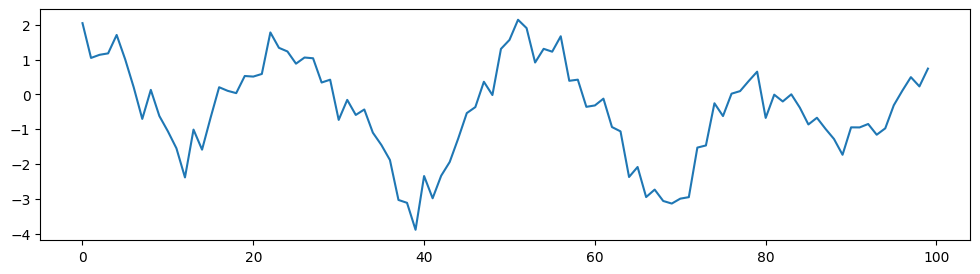

In [13]:
import matplotlib.pyplot as plt

filepath = "raw_mafaulda_matlab/B_O_0_0.mat"
data = read_matlab_file(filepath)
data = data['Underhang_Radial']
data = data[:, :100][0]
df = pd.DataFrame(data)
plt.figure(figsize=(12, 3))
plt.plot(df)

In [15]:
def downsample(data, original_freq, post_freq):
    step = 1 / abs(original_freq - post_freq)

    indices_to_delete = [i for i in range(0, np.size(data), round(step*original_freq))]

    return np.delete(data, indices_to_delete)


In [23]:
resampled_data = downsample(data, 11, 9)
resampled_data.shape

(83,)